# 1. Linear Regression

## Introduction

Linear regression is one of the simplest and most widely used machine learning models. It models the relationship between an independent variable ($x$) and a dependent variable ($y$) using a linear function.

The linear regression model is defined as:

$$
f_{(w,b)}(x) = wx + b
$$

Where:
- **$x$**: 
    - The input variable (also called an independent variable or feature).
    - Represents the value for which we want to predict an output.
- **$w$**:
    - The weight (also called slope or coefficient).
    - Determines the strength and direction of the relationship between $x$ and $y$.
- **$b$**:
    - The bias (also called the intercept).
    - Represents the value of $y$ when $x = 0$, i.e., where the line crosses the y-axis.
- **$f(x)$**: 
    - The model function.
    - Returns the estimated or predicted value ($\hat{y}$).
    - Maps the input variable $x$ to the predicted output using learned parameters $(w,b)$.
- **$\hat{y}$**:
    - The predicted value.
    - Represents the output value predicted by the model.



## Simple Implementation

Below is a simple Python implementation of a linear regression model:

In [1]:
import numpy as np
from numpy.typing import NDArray

In [2]:
def predict(x: float, w: float, b: float) -> float:
    """
    Computes the predicted value for a given input using a linear function.

    Args:
        x (float): The input value (independent variable).
        w (float): The weight (slope of the line).
        b (float): The bias (y-intercept of the line).

    Returns:
        float: The predicted output value.
    """
    
    return x * w + b

Let's use this function to predict a value:

In [3]:
x = 1000
w = 3
b = 50

y_hat = predict(x, w, b)
print(f'Prediction: {y_hat}')

Prediction: 3050


## Training a Model

Training a model refers to the process of learning the optimal values of the weights ($w$) and bias ($b$) to map inputs ($x$) to outputs ($y$). The learning process involves finding the values of $w$ and $b$ that minimize the error between the predicted output ($\hat{y}$) and the actual output ($y$).

To achieve this, we need to define a loss function that quantifies the error between the predicted and actual values. The loss function measures the difference between the predicted and actual values for a given input. The goal of training the model is to find the values of $w$ and $b$ that minimize this loss function.

### Squared Loss Function

The squared loss function is a common choice for linear regression problems. It calculates the squared difference between the predicted and actual values for each data point.

The squared loss function is defined as:

$$
L(y, \hat{y}) = (y - \hat{y})^2
$$

Where:
- **$L$**: The loss function. Measures the error between the predicted ($\hat{y}$) and actual ($y$) values.
- **$y$**: The actual output value.
- **$\hat{y}$**: The predicted output value.

## Cost Function

The cost function is a measure of how well the model performs on the entire training set. It is calculated as the average loss over all the training examples. The cost function is dependent on the model's parameters $(w,b)$ and is used to guide the training process by updating the weights to minimize the cost.

$$
J_{(w,b)} = \frac{1}{2m} \sum_{i=1}^{m}(\hat{y^i} - y^i)^2
$$

$$
J_{(w,b)} = \frac{1}{2m} \sum_{i=1}^{m}(f_{(x,w)}(x^i) - y^i)^2
$$

Where:
- **$m$**: Is the size of (number of items in) the training set $(x,y)$
- **Training set $(x,y)$**: The set of input-output pairs used to train the model.
- **$y^i$**: The actual output value for the $i^{th}$ input.
- **$\hat{y^i}$**: The predicted output value for the $i^{th}$ input.

Below is a simple Python implementation of the cost function:

In [4]:
def compute_cost(
    x: NDArray[np.float64], y: NDArray[np.float64], w: float, b: float
) -> float:
    """
    Computes the cost function for a given linear regression model with a single feature.

    Args:
        x: The input values (independent variables).
        y: The output values (dependent variables).
        w: The weight (slope of the line).
        b: The bias (y-intercept of the line).

    Returns:
        The cost value.
    """

    m = x.shape[0]  # Number of training examples
    return sum((predict(x[i], w, b) - y[i]) ** 2 for i in range(m)) / m

Now let's use this function to calculate the cost for a given set of parameters $(w,b)$:


In [5]:
np.random.seed(42)
x_train: NDArray[np.float64] = 2 * np.random.rand(100)  # Feature
y_train: NDArray[np.float64] = 4 + 3 * x_train + np.random.randn(100)  # Target with some noise

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f'x_train: {x_train[:5]}')
print(f'y_train: {y_train[:5]}')

w = 3
b = 50

cost = compute_cost(x_train, y_train, w, b)
print(f'Cost: {cost}')

x_train shape: (100,)
y_train shape: (100,)
x_train: [0.74908024 1.90142861 1.46398788 1.19731697 0.31203728]
y_train: [6.33428778 9.40527849 8.48372443 5.60438199 4.71643995]
Cost: 2116.924499915305


## Minimizing the Cost Function

We need to find the values of $w$ and $b$ that minimize the cost function $J_{(w,b)}$ so that the model can make accurate predictions.
For a simple linear regression model, we can easily solve for the optimal values of $w$ and $b$ by finding the slope and intercept of the line that best fits the data.

### Gradient Descent

Our cost is too high, which means our model is not fitting the data well. We need to adjust the parameters $(w,b)$ to minimize the cost.

Gradient Descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient.

We will use the gradient of the cost function to update the parameters $(w,b)$ in the direction that minimizes the cost.

The gradient descent algorithm is defined as:

$$  
w = w - \alpha \frac{\partial J_{(w,b)}}{\partial w}
$$

$$
b = b - \alpha \frac{\partial J_{(w,b)}}{\partial b}
$$

Where:
- **$\alpha$**: The learning rate.
    - A hyperparameter that controls how much we are adjusting the weights of our network with respect to the loss gradient.
    - A small learning rate requires more training epochs, but a large learning rate may cause the model to converge too quickly to a suboptimal solution.

The partial derivatives of the cost function with respect to the parameters $(w,b)$ are:

$$
\frac{\partial J_{(w,b)}}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (f_{(w,b)}(x^i) - y^i) x^i
$$

$$
\frac{\partial J_{(w,b)}}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (f_{(w,b)}(x^i) - y^i)
$$

Below is a simple Python implementation of the gradient descent algorithm:

In [6]:
def gradient_descent(
    x_train: NDArray[np.float64],
    y_train: NDArray[np.float64],
    n_iterations: int = 1000,
    learning_rate: float = 0.001,
) -> tuple[float, float, list[float]]:

    theta_0: float = np.random.randn()  # Initialize theta_0 randomly
    theta_1: float = np.random.randn()  # Initialize theta_1 randomly
    cost_history: list[float] = []

    for _ in range(n_iterations):
        predictions = x_train * theta_1 + theta_0
        errors = predictions - y_train
        
        theta_0 -= learning_rate * float(np.mean(errors))
        theta_1 -= learning_rate * float(np.mean(errors * x_train))
        
        cost = compute_cost(x_train, y_train, theta_1, theta_0)
        
        cost_history.append(cost)

    return (theta_0, theta_1, cost_history)

In [7]:
b, w, cost_history = gradient_descent(x_train, y_train)
print(f'Theta 0: {b}')
print(f'Theta 1: {w}')

cost = compute_cost(x_train, y_train, w, b)
print(f"Final Cost: {cost}")

Theta 0: 2.4580759579293456
Theta 1: 3.6853537392610805
Final Cost: 1.9036198210248854


## Multiple Features

In the simple linear regression model, we used only one feature $(x)$ to predict the output $(y)$. However, in practice, we often have multiple features that can be used to make predictions.

The linear regression model can be extended to multiple features by adding a weight $(w_i)$ for each feature $(x_i)$ and a single bias term $(b)$:

$$
f_{(w,b)}(x) = \sum_{i=1}^{n} w_i x_i + b
$$

Where:
- **$n$**: The number of features.
- **$x_i$**: The $i^{th}$ feature.
- **$w_i$**: The weight corresponding to the $i^{th}$ feature.


This can also be written as:

$$
f_{(w,b)}(x) = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b
$$

## Vectorization

Vectorization is a technique used to speed up the code by replacing explicit loops with matrix operations. It allows us to perform operations on entire arrays at once, making the code more efficient and easier to read.

We can rewrite the linear regression model using vectorized operations as follows:

$$
f_{(\mathbf{w},b)}(X) = X \cdot \mathbf{w} + b
$$

Where:
- **$X$**: The matrix of input features.
- **$\mathbf{w}$**: The vector of weights.
- **$b$**: The bias term.

This equation uses the dot product to calculate the predicted values for all the input examples in a single operation.

Let's redefine our `predict` function using vectorized operations:

In [8]:
def predict(x: NDArray[np.float64], w: NDArray[np.float64], b: float) -> float:
    """
    Computes the predicted value for a given input using a linear function.
    
    Args:
        x: The input values (independent variables).
        w: The weights (slopes of the line).
        b: The bias (y-intercept of the line).
        
    Returns:
        The predicted output value.
    """

    return np.dot(x, w) + b

In [9]:
x = np.array([1000, 2000, 3000])  # an input with 3 features
w = np.array([1, 2, 3])  # weights for each feature
b = 50  # bias

y_hat = predict(x, w, b)
print(f"Prediction: {y_hat}")

Prediction: 14050


## Cost Function In Matrix Form

The cost function can also be updated as follows for multiple features:

$$
J_{(\mathbf{w},b)} = \frac{1}{2m} \sum_{i=1}^{m}(\hat{y^i} - y^i)^2
$$

$$
J_{(\mathbf{w},b)} = \frac{1}{2m} \sum_{i=1}^{m}(f_{(\mathbf{w},b)}(X^i) - y^i)^2
$$



Since taking squaring a matrix means taking its transpose times itself, we can rewrite the cost function in matrix form as:

$$
J_{(\theta)} = \frac{1}{2m} (X \cdot \theta - y)^T \cdot (X \cdot \theta - y)
$$

Where:
- **$X$**: The matrix of input features.
- **$\theta$**: The vector of parameters $(\mathbf{w},b)$.
- **$y$**: The vector of actual output values.



In [10]:
def compute_cost(
    X: NDArray[np.float64], y: NDArray[np.float64], theta: NDArray[np.float64]
) -> float:
    """
    Computes the cost function for a given linear regression model with multiple features.
    
    Args:
        X: The input values (independent variables).
        y: The output values (dependent variables).
        theta: The weights and bias.
        
    Returns:
        The cost value.
    """

    predictions = X @ theta
    errors = predictions - y

    # cost = float(np.mean(errors.T @ errors)/2) 

    # More efficient way to compute the cost
    cost = float(np.dot(errors, errors) / (2 * X.shape[0]))

    return cost

### Detailed Steps

Here is detailed steps of how our `compute_cost` function works:

Let's say we have **three training examples** and **two actual features** (plus a bias term), meaning `X` has three columns.

#### **Given Data**

$$
X =
\begin{bmatrix}
1 & 2 & 3 \\
1 & 4 & 5 \\
1 & 6 & 7
\end{bmatrix}
$$

where:
- The **first column** is the bias term (`1`).
- The **second column** is the first actual feature.
- The **third column** is the second actual feature.

The actual target values are:

$$
y =
\begin{bmatrix}
10 \\
20 \\
30
\end{bmatrix}
$$

The parameter vector (θ) is:

$$
\theta =
\begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix}
$$

---

#### **Step 1: Compute Predictions**
We compute:

$$
X \cdot \theta =
\begin{bmatrix}
1 & 2 & 3 \\
1 & 4 & 5 \\
1 & 6 & 7
\end{bmatrix}
\cdot
\begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix}
$$

Perform matrix multiplication:

$$
\begin{bmatrix}
(1 \times 1) + (2 \times 2) + (3 \times 3) \\
(1 \times 1) + (4 \times 2) + (5 \times 3) \\
(1 \times 1) + (6 \times 2) + (7 \times 3)
\end{bmatrix}
=
\begin{bmatrix}
1 + 4 + 9 \\
1 + 8 + 15 \\
1 + 12 + 21
\end{bmatrix}
=
\begin{bmatrix}
14 \\
24 \\
34
\end{bmatrix}
$$

These are our **predicted values**.

---

#### **Step 2: Compute Errors**
Now, subtract the actual `y` values from the predictions:

$$
\text{errors} = X\theta - y =
\begin{bmatrix}
14 \\
24 \\
34
\end{bmatrix}
-
\begin{bmatrix}
10 \\
20 \\
30
\end{bmatrix}
=
\begin{bmatrix}
4 \\
4 \\
4
\end{bmatrix}
$$

---

#### **Step 3: Compute the Squared Errors**
Square each error term:

$$
\text{errors}^2 =
\begin{bmatrix}
4^2 \\
4^2 \\
4^2
\end{bmatrix}
=
\begin{bmatrix}
16 \\
16 \\
16
\end{bmatrix}
$$

---

#### **Step 4: Compute the Mean and Final Cost**
First, sum the squared errors:

$$
\sum \text{errors}^2 = 16 + 16 + 16 = 48
$$

Take the mean:

$$
\frac{1}{m} \sum \text{errors}^2 = \frac{48}{3} = 16
$$

Now, divide by **2** to get the final cost:

$$
J(\theta) = \frac{1}{2} \times 16 = 8
$$


## Gradient Descent In Matrix Form

The gradient of the cost function with respect to the parameters $(\mathbf{w},b)$ can be updated as follows for multiple features:

$$
\frac{\partial J_{(\theta)}}{\partial \mathbf{w}} = \frac{1}{m} X^T \cdot (X \cdot \theta - y)
$$

In [11]:
def gradient_descent(
    X: NDArray[np.float64],
    y: NDArray[np.float64],
    epoch: int = 1_000,
    alpha: float = 0.001,
) -> NDArray[np.float64]:
    """
    Performs the gradient descent optimization algorithm to learn the weights and bias
    
    Args:
        X: The input values (independent variables).
        y: The output values (dependent variables).
        epoch: The number of iterations to update the weights and bias.
        alpha: The learning rate.
        
    Returns:
        The weights and bias that minimize the cost function.
    """

    m, n = X.shape  # Number of samples (m) and features (n)
    theta = np.random.randn(n, 1)

    for _ in range(epoch):
        predictions = X @ theta
        errors = predictions - y

        gradients = (X.T @ errors) / m

        theta -= alpha * gradients

    return theta

In [12]:
# Set seed for reproducibility
np.random.seed(42)

m, n = 100, 3  # 100 samples, 3 features (excluding bias)
theta_actual = np.random.randn(n + 1, 1)  # True weights (including bias)

# Generate random training data
X_train = 2 * np.random.rand(m, n)  # Features
X_train = np.c_[np.ones((m, 1)), X_train]  # Add bias column

# Generate target values with some noise
y_train = X_train @ theta_actual + np.random.randn(m, 1)

print(f"Actual weights:\n{theta_actual}")

# Train using gradient descent
theta_predicted = gradient_descent(X_train, y_train)

print(f"Predicted weights:\n{theta_predicted}")

Actual weights:
[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]
 [ 1.52302986]]
Predicted weights:
[[0.05967946]
 [0.46571906]
 [1.28957003]
 [0.66230754]]


## Normal Equation

When the number of features is not very large, we can use the normal equation to find the optimal values of the parameters $(\mathbf{w},b)$ directly.

The normal equation is given by:

$$
\theta = (X^T X)^{-1} X^T y
$$

Where:
- **$X$**: The matrix of input features.
- **$y$**: The vector of actual output values.
- **$\theta$**: The vector of parameters $(\mathbf{w},b)$.


In [13]:
def normal_equation(
    X: NDArray[np.float64],
    y: NDArray[np.float64],
) -> NDArray[np.float64]:
    """
    Computes the weights using the normal equation method.

    Args:
        X: The input values (independent variables).
        y: The output values (dependent variables).

    Returns:
        The weights that minimize the cost function.
    """

    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

In [14]:
# Train using normal eq
theta_predicted = normal_equation(X_train, y_train)

print(f"Predicted weights:\n{theta_predicted}")

Predicted weights:
[[0.07158197]
 [0.08773787]
 [0.91882845]
 [1.49947743]]


## Convergence Tests

Convergence tests are used to determine when to stop the training process. They help prevent overfitting and ensure that the model generalizes well to unseen data.

### Learning Curve


A common approach is to use the Learning Curve, which plots the cost function over the training iterations. The learning curve helps visualize how the cost decreases over time and can be used to identify when the model has converged.

When checking the learning curve, we look for the following signs of convergence:
- The cost decreases with each iteration.
- The cost stabilizes and flattens out over time as the model converges.

If the cost continues to decrease without stabilizing, it may indicate that the learning rate is too high, causing the model to overshoot the optimal values.

### Epsilon Threshold

Another approach is to use an epsilon threshold to check if the change in the cost function between iterations is below a certain threshold. If the change is less than the threshold, the model is considered to have converged.

The epsilon threshold is defined as:

$$
\text{if } |J_{(\theta)}^{(i)} - J_{(\theta)}^{(i-1)}| < \epsilon \text{, then the model has converged}
$$

Where:
- **$J_{(\theta)}^{(i)}$**: The cost function at iteration $i$.
- **$J_{(\theta)}^{(i-1)}$**: The cost function at the previous iteration.
- **$\epsilon$**: The threshold value.


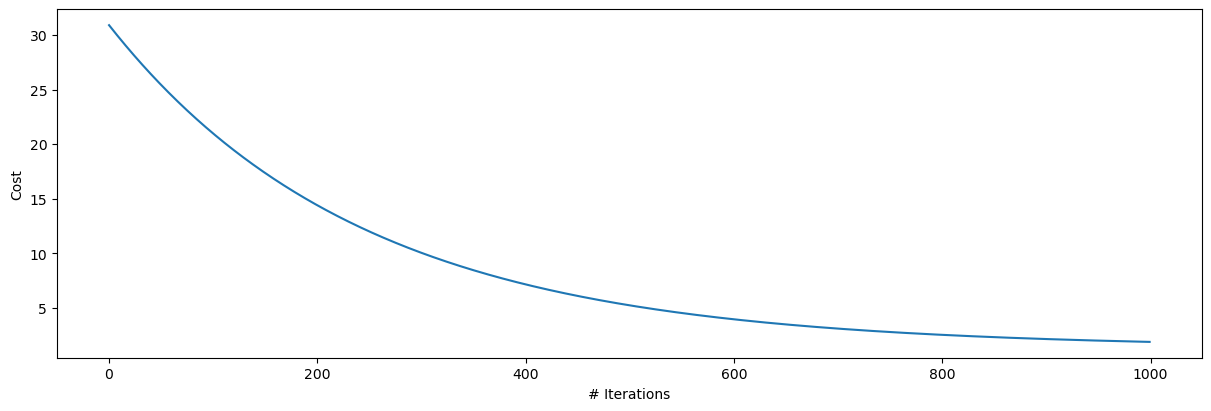

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4), layout="constrained")
plt.plot(cost_history)
plt.xlabel("# Iterations")
plt.ylabel("Cost")
plt.show()

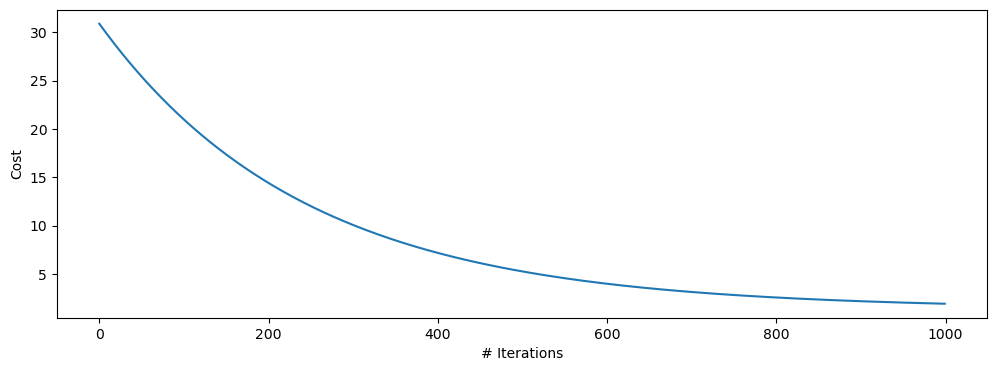

In [16]:
# Better to use OOP style for plotting

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(cost_history)
ax.set(xlabel="# Iterations", ylabel="Cost")
plt.show()

## Linear Regression with Scikit-Learn

Scikit-Learn is a popular machine learning library in Python that provides a wide range of tools for building machine learning models. It includes a simple and efficient implementation of linear regression that can be used to train and evaluate models.


In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

print(f"Predicted weights: {model.coef_}")

Predicted weights: [[0.         0.08773787 0.91882845 1.49947743]]
